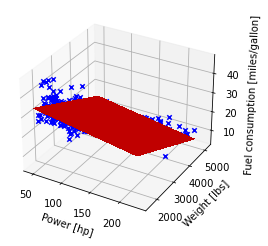

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



# read cars dataset, a clean data set
cars = pd.read_csv('auto-mpg.data.txt',header=None, sep='\s+')

# extract mpg values
y = cars.iloc[:,0].values

# extract horsepower and weight values
X = cars.iloc[:,[3,4]].values

# fit linear regression model
reg = linear_model.LinearRegression()
reg.fit(X,y)

# coefficients
reg.intercept_ # 45.640210840177119
reg.coef_ # [-0.04730286 -0.00579416]

# compute correlation coefficient
np.corrcoef(reg.predict(X),y) # 0.84046135

# compute mean squared error (MSE)
sum((reg.predict(X) - y)**2) / len(y) # 17.841442442550584

### Plot the hyperplane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot data points
for i in range(0,len(y)):
    ax.scatter(X[i,0], X[i,1], y[i], color='blue', marker='x')

# plot hyperplane
X0 = np.arange(min(X[:,0]), max(X[:,0]), 25)
X1 = np.arange(min(X[:,1]), max(X[:,1]), 25)
X0, X1 = np.meshgrid(X0, X1)
Z = X0.copy()
n = X0.shape[0]
m = X0.shape[1]
for i in range(0, n):
    for j in range(0, m):
        Z[i,j] = reg.predict([[X0[i,j], X1[i,j]]])
ax.plot_surface(X0, X1, Z, color='red', linewidth=0, antialiased=False)
ax.set_xlabel('Power [hp]')
ax.set_ylabel('Weight [lbs]')
ax.set_zlabel('Fuel consumption [miles/gallon]')
plt.show()
